<a href="https://colab.research.google.com/github/Ndifreke000/Machine-Learning-Projects/blob/master/PINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.metrics import confusion_matrix


from scipy import stats


In [2]:
from google.colab import files;
files = files.upload()

Saving [dca]_ML.xlsx to [dca]_ML.xlsx


In [3]:
# Load the dataset
data = pd.read_excel('[dca]_ML.xlsx')

In [4]:
# Basic data exploration
print("First few rows of the dataset:")
print(data.head())
print(f"Data description:\n{data.describe()}")
print(f"Data types:\n{data.dtypes}")
print(f"Missing values:\n{data.isnull().sum()}")
print(f"Unique values in each column:\n{data.nunique()}")
print(f"Shape of the dataset: {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2} MB")
print(f"Memory usage by data type:\n{data.memory_usage(deep=True)}")

First few rows of the dataset:
   code    cation   anion            IL  molar mass  Temperature/K  \
0    10  [C4mim]+  [DCA]-  [C4mim][DCA]      205.26         283.16   
1    10  [C4mim]+  [DCA]-  [C4mim][DCA]      205.26         293.16   
2    10  [C4mim]+  [DCA]-  [C4mim][DCA]      205.26         298.13   
3    10  [C4mim]+  [DCA]-  [C4mim][DCA]      205.26         303.14   
4    10  [C4mim]+  [DCA]-  [C4mim][DCA]      205.26         313.16   

   Pressure/MPa  Density  Total V/cm3/mol  Reference   C4mim V/cm3/mol  \
0           0.1   1.0693       191.957355         14        132.805161   
1           0.1   1.0628       193.131351         14        133.717072   
2           0.1   1.0597       193.696329         14        134.113358   
3           0.1   1.0565       194.283010         14        134.519379   
4           0.1   1.0502       195.448486         14        135.431046   

   V/cm3/mol  
0  59.152195  
1  59.414280  
2  59.582972  
3  59.763631  
4  60.017440  
Data descript

In [11]:
# Basic data exploration
data_description = data.describe()
print(data_description)


        code    molar mass  Temperature/K  Pressure/MPa     Density  \
count  104.0  1.040000e+02     104.000000    104.000000  104.000000   
mean    10.0  2.052600e+02     328.583365     42.733702    1.057346   
std      0.0  2.284748e-13      36.939873     33.596789    0.024552   
min     10.0  2.052600e+02     283.130000      0.100000    1.001130   
25%     10.0  2.052600e+02     296.875000     10.031250    1.038755   
50%     10.0  2.052600e+02     313.180000     39.745000    1.060770   
75%     10.0  2.052600e+02     353.160000     69.996250    1.075348   
max     10.0  2.052600e+02     393.170000     99.916000    1.102800   

       Total V/cm3/mol  Reference   C4mim V/cm3/mol   V/cm3/mol  
count       104.000000      104.0        104.000000  104.000000  
mean        194.232108       14.0        133.794825   60.437283  
std           4.545679        0.0          3.721263    0.946544  
min         186.126224       14.0        126.934547   59.136592  
25%         190.877911       1

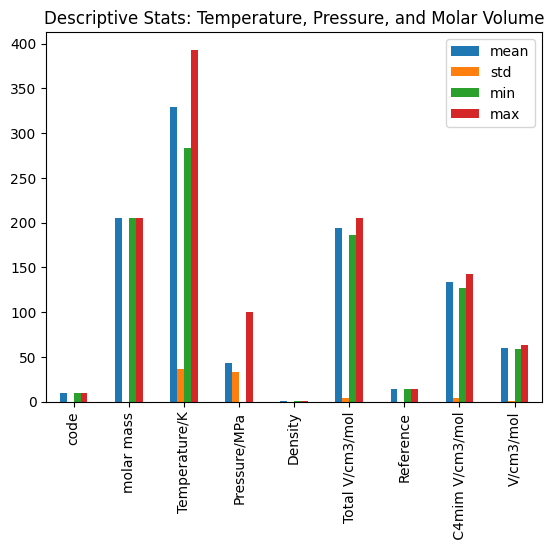

In [12]:
# Visualize data description
data_description.T[['mean', 'std', 'min', 'max']].plot(kind='bar', title="Descriptive Stats: Temperature, Pressure, and Molar Volume")
plt.show()

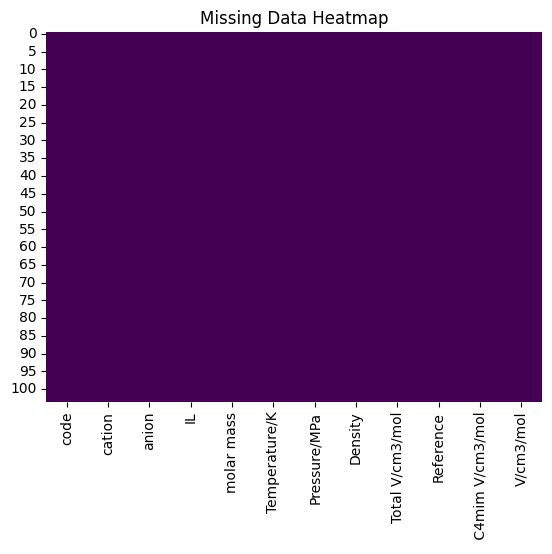

Shape of the cleaned dataset: (104, 12)


In [13]:
# Check for missing values
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Remove missing values
data_cleaned = data.dropna()
print(f"Shape of the cleaned dataset: {data_cleaned.shape}")

In [15]:
# Calculate Z-scores for outlier detection
# Convert relevant columns to numeric, errors='coerce' handles non-numeric values
numeric_data = data_cleaned.select_dtypes(include=np.number)  # Select only numeric columns
z_scores = np.abs(stats.zscore(numeric_data))
# Apply outlier filter to the original DataFrame based on numeric columns
data_no_outliers = data_cleaned[(z_scores < 3).all(axis=1)]

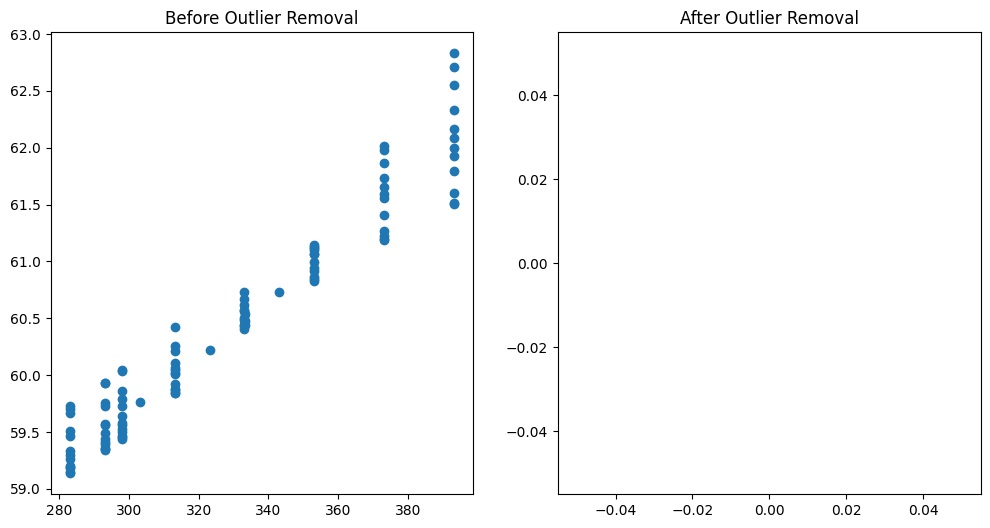

In [16]:
# Scatterplot before and after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_cleaned['Temperature/K'], data_cleaned['V/cm3/mol'])
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
plt.scatter(data_no_outliers['Temperature/K'], data_no_outliers['V/cm3/mol'])
plt.title("After Outlier Removal")
plt.show()


In [18]:
# Feature selection: We use Temperature and Pressure as inputs
# Target: We use the molar volume 'V/cm3/mol' as the output variable
X = data[['Temperature/K', 'Pressure/MPa']].values
y = data['V/cm3/mol'].values

# Scale the features (standardization)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Train-test split to create a validation set
# The test set is stored and reused during prediction as per your preference
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

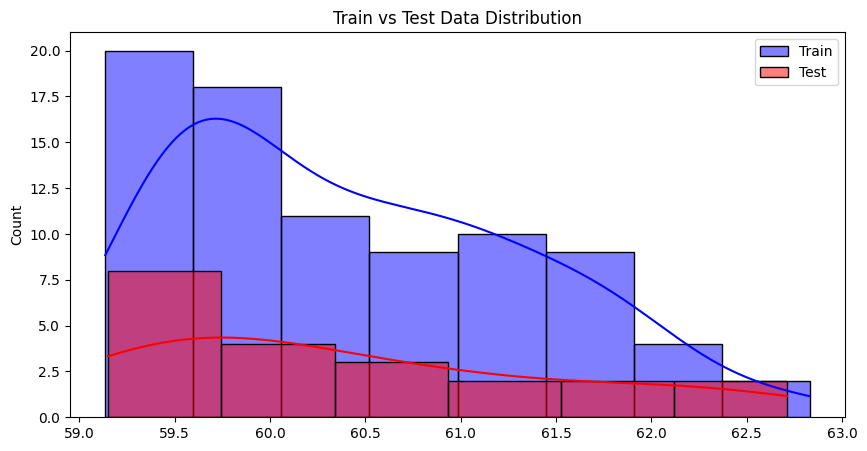

In [20]:
# Plot distribution of training vs test set
plt.figure(figsize=(10, 5))
sns.histplot(y_train, color='blue', label='Train', kde=True)
sns.histplot(y_test, color='red', label='Test', kde=True)
plt.legend()
plt.title("Train vs Test Data Distribution")
plt.show()

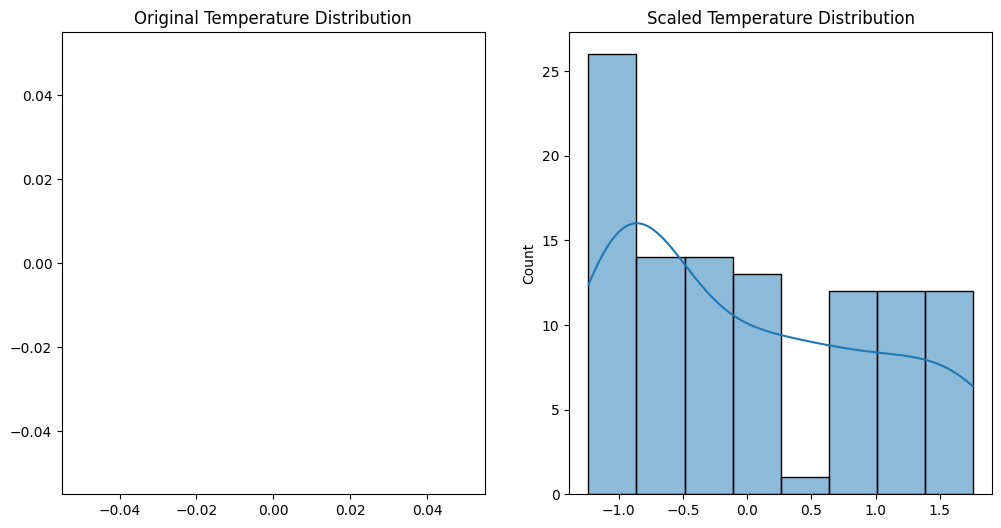

In [19]:
# Distribution of features before and after scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_no_outliers['Temperature/K'], kde=True)
plt.title("Original Temperature Distribution")

plt.subplot(1, 2, 2)
sns.histplot(X_scaled[:, 0], kde=True)
plt.title("Scaled Temperature Distribution")
plt.show()


In [6]:
# Define the Physics-Informed Neural Network (PINN) model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        # Define two hidden layers with 64 neurons each, using 'relu' activation
        self.dense1 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.dense2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        # Output layer predicting one value: the molar volume (V/cm3/mol)
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        # Pass input data through the layers
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.output_layer(x)


In [7]:
# Custom loss function incorporating both data-based and physics-based loss
def custom_loss_function(y_true, y_pred):
    # Mean Squared Error (MSE) for the data-driven part
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Placeholder for physics-based loss component (this depends on your physics model)
    # You might integrate specific physical laws related to molar volume here.
    # In this case, we're focusing on how the properties (like volume) should change
    # with respect to temperature and pressure based on known physical relationships.
    # Example: Ideal gas law or any real gas model can be applied.
    # physics_loss = ...

    total_loss = mse  # For now, we're just using MSE, but physics_loss can be added
    return total_loss


In [8]:
# Early stopping callback to prevent overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Build and compile the model
model = PINN()  # Instantiate the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6),
              loss=custom_loss_function)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


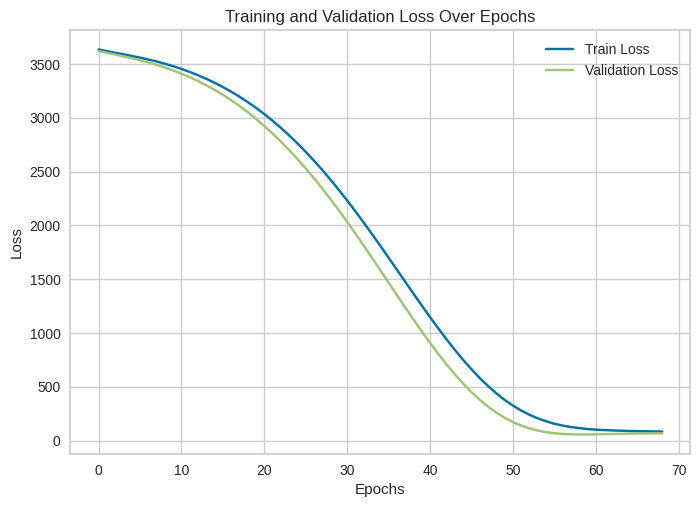

In [39]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Train the model on training data, validating on the test set
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                    callbacks=[early_stopping_cb], verbose=0)

# Predicting the test data to evaluate the model
y_pred_test = model.predict(X_test)

# Evaluation: Mean Squared Error (MSE) and R-squared score
final_mse = mean_squared_error(y_test, y_pred_test)
final_r2 = r2_score(y_test, y_pred_test)
print(f'Final MSE on test data: {final_mse:.4f}')
print(f'Final R2 on test data: {final_r2:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Final MSE on test data: 56.2946
Final R2 on test data: -47.0672


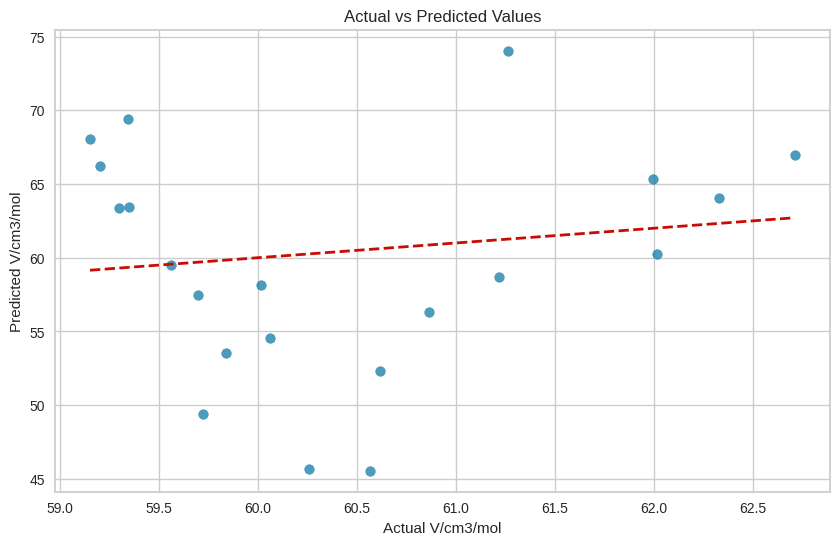

In [27]:
#*Plot Actual vs Predicted Values**
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual V/cm3/mol')
plt.ylabel('Predicted V/cm3/mol')
plt.grid(True)
plt.show()

In [38]:
# Calculate RAAD (Relative Average Absolute Deviation)
absolute_differences = np.abs(y_test - y_pred_test.flatten())
mean_actual_value = np.mean(y_test)
RAAD = np.mean(absolute_differences / mean_actual_value) * 100
print(f"Relative Average Absolute Deviation (RAAD): {RAAD:.2f}%")

Relative Average Absolute Deviation (RAAD): 10.20%


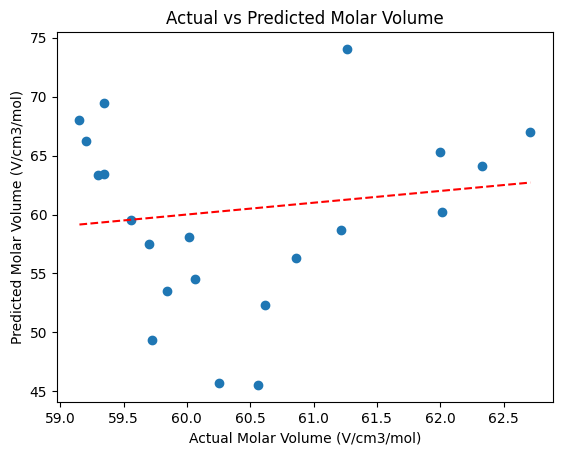

Relative Average Absolute Deviation (RAAD): 10.20%


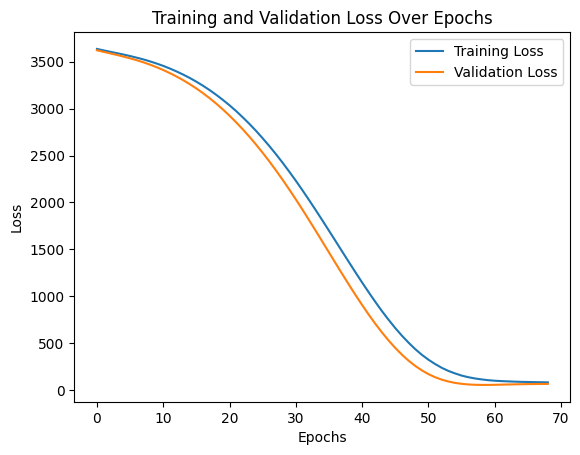

In [10]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# **Additional Metrics Calculation**
# 4. **Mean Absolute Error (MAE)**
from sklearn.metrics import mean_absolute_error # Importing the necessary function
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 6.1612


In [30]:
 #5. **Mean Squared Error (MSE)**
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 56.2946


In [31]:
# 6. **R² Score**
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score: {r2:.4f}")


R² Score: -47.0672


In [32]:
# 7. **Relative Average Absolute Deviation (RAAD)**
absolute_differences = np.abs(y_test - y_pred_test)
mean_actual_volume = np.mean(y_test)
RAAD = np.mean(absolute_differences / mean_actual_volume) * 100
print(f"Relative Average Absolute Deviation (RAAD): {RAAD:.2f}%")

Relative Average Absolute Deviation (RAAD): 10.38%


In [33]:
# 8. **F1 Score Adaptation for Regression** (Optional: Threshold-based analysis)
# Defining thresholds to classify predictions as accurate or not
threshold = 0.05  # Allowable deviation percentage
accurate_predictions = np.abs((y_pred_test - y_test) / y_test) <= threshold
inaccurate_predictions = ~accurate_predictions

Confusion Matrix (Adapted for Regression):
 [[ 0 11]
 [ 1  9]]


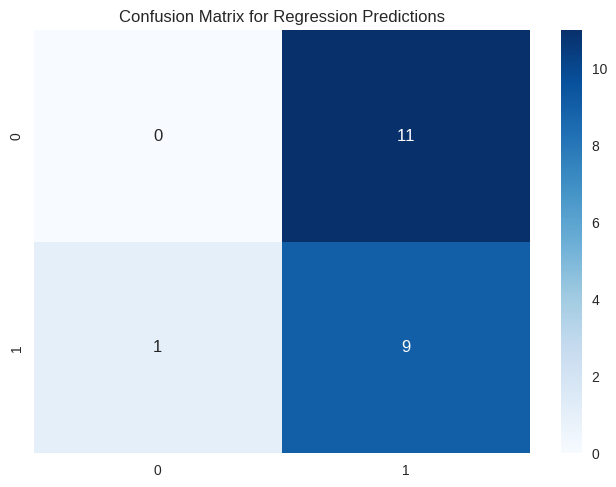

In [37]:
# Import the necessary library
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'accurate_predictions_binary' is the primary target
# and you want to see confusion against 'inaccurate_predictions_binary'
# you need to reduce them to 1D arrays representing a single class per sample

# Option 1: If a sample is considered accurate if ANY of its predictions are accurate:
accurate_predictions_1d = np.any(accurate_predictions_binary, axis=1).astype(int)
inaccurate_predictions_1d = np.any(inaccurate_predictions_binary, axis=1).astype(int)

# Option 2: If a sample is considered accurate if ALL of its predictions are accurate:
# accurate_predictions_1d = np.all(accurate_predictions_binary, axis=1).astype(int)
# inaccurate_predictions_1d = np.all(inaccurate_predictions_binary, axis=1).astype(int)

# Choose one of the options above based on your desired logic

# Now use the 1D arrays for the confusion matrix:
confusion = confusion_matrix(accurate_predictions_1d, inaccurate_predictions_1d)

print("Confusion Matrix (Adapted for Regression):\n", confusion)

# Visualizing Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Regression Predictions')
plt.show()